In [2]:
%matplotlib inline

# Import Matplotlib to plot data 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Import the pandas library.
import pandas

# Import a convenience function to split the sets.
from sklearn.cross_validation import train_test_split

# Import the linearregression model.
from sklearn.linear_model import LinearRegression

# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error,  r2_score

# Import the random forest model.
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# Read in the data.
games = pandas.read_csv("games.csv")
# Print the names of the columns in games.
print(games.columns)

Index([u'id', u'type', u'name', u'yearpublished', u'minplayers', u'maxplayers',
       u'playingtime', u'minplaytime', u'maxplaytime', u'minage',
       u'users_rated', u'average_rating', u'bayes_average_rating',
       u'total_owners', u'total_traders', u'total_wanters', u'total_wishers',
       u'total_comments', u'total_weights', u'average_weight'],
      dtype='object')


In [4]:
# Remove any rows without user reviews.
games = games[games["users_rated"] > 0]
# Remove any rows with missing values.
games = games.dropna(axis=0)

In [5]:
games.corr()["average_rating"]

id                      0.304201
yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

In [6]:
# Store the variable we'll be predicting on.
target = "average_rating"

In [7]:
# Generate the training set.  Set random_state to be able to replicate results.
train = games.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = games.loc[~games.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [8]:
train_X=train["average_weight"].reshape(len(train["average_weight"]),1)
test_X=test["average_weight"].reshape(len(test["average_weight"]),1)

In [9]:
# Initialize the model class.
model = LinearRegression()
# Fit the model to the training data.
model.fit(train_X, train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# Generate our predictions for the test set.
predictions = model.predict(test_X)

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, test[target])

8.5672849144554367e-27

('Coefficients: \n', array([ 1.]))
Mean squared error: 0.00
Variance score: 1.00


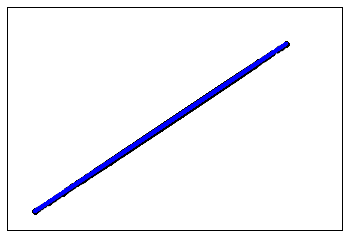

In [11]:
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(predictions, test[target]))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(predictions, test[target]))

# Plot outputs
plt.scatter(test_X, test[target],  color='black')
plt.plot(test_X , predictions, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [14]:
# Initialize the model with some parameters.
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
model.fit(train[columns], train[target])
# Make predictions.
predictions = model.predict(test[columns])
# Compute the error.
mean_squared_error(predictions, test[target])

1.4144642407044481